<a href="https://colab.research.google.com/github/hritikchaturvedi11/MLnow_2.0/blob/main/Univeriate_linear_regression_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**: There are total of _26 labels_ in the dataset. Three mostly advertised features-> _Carbody(Sedan,Hatchback), engine size_ and _peakRPM_ is related to the price is already available in the dataset. We will be only looking the _**engine size**_.

[Link to Download the dataset](https://www.kaggle.com/hellbuoy/car-price-prediction)

Problem statement: Predict the car price from it's engine size



**Date Created**: June , 2021

Topic: Univariate Linear Regression

**Author**:
 Hritik Chaturvedi

[[Assessment Repository](https://github.com/hritikchaturvedi11/MLnow_2.0)]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Machine Learning google colab/EDA/Car_Price_Prediction'

/content/drive/MyDrive/Machine Learning google colab/EDA/Car_Price_Prediction


In [3]:
ls

CarPrice_Assignment.csv


Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tensorflow import keras

Importing the data

In [8]:
priceData = pd.read_csv('CarPrice_Assignment.csv');

Let's know more about the data.

In [9]:
priceData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
priceData.shape

(205, 26)

## **Data Pre-processing**

Now we know we have 205 price  details and 26 labels. But for our today's problem we need to drop out the features that are not necessary.

In [14]:
print(f'fueltype: {priceData.fueltype.unique()}')
print(f'aspiration: {priceData.aspiration.unique()}')
print(f'enginetype: {priceData.enginetype.unique()}')
print(f'cylindernumber: {priceData.cylindernumber.unique()}')
print(f'fuelsystem: {priceData.fuelsystem.unique()}')

fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [17]:
#convert the categories into numbers 

#binary valued 

priceData['fueltype'] = priceData['fueltype'].apply({'gas':1, 'diesel':0}.get)
priceData['aspiration'] = priceData['aspiration'].apply({'std':1 ,'turbo':0}.get)

In [15]:
#multivalued conversion
priceData['enginetype'] = priceData['enginetype'].apply({'dohc':1, 'ohcv':2, 'ohc':3, 'l':4, 'rotor':5, 'ohcf':6, 'dohcv':7}.get)
priceData['cylindernumber'] = priceData['cylindernumber'].apply({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':1}.get)
priceData['fuelsystem'] = priceData['fuelsystem'].apply({'mpfi':1, '2bbl':2, 'mfi':3, '1bbl':4, 'spfi':5, '4bbl':6, 'idi':7, 'spdi':8}.get)

In [18]:
priceData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,1,4,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,1,4,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,2,6,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,3,4,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,3,5,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
#Selecting columns
priceData=priceData[['fueltype','aspiration','enginetype','cylindernumber','fuelsystem','enginesize','price']]

In [22]:
priceData.tail(10)

,fueltype,aspiration,enginetype,cylindernumber,fuelsystem,enginesize,price
195,1,1,3,4,1,141,13415.0
196,1,1,3,4,1,141,15985.0
197,1,1,3,4,1,141,16515.0
198,1,0,3,4,1,130,18420.0
199,1,0,3,4,1,130,18950.0
200,1,1,3,4,1,141,16845.0
201,1,0,3,4,1,141,19045.0
202,1,1,2,6,1,173,21485.0
203,0,0,3,6,7,145,22470.0
204,1,0,3,4,1,141,22625.0


Now, It's look perfect, our dataset is ready after some pre-processing. Now we will export the clean data and than work on it.

In [23]:
priceData.to_csv('cleanCarPrice.csv')

In [24]:
ls

CarPrice_Assignment.csv  cleanCarPrice.csv


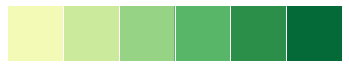

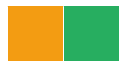

In [31]:
import seaborn as sns
sns.palplot(sns.color_palette('YlGn')) 
pal= sns.color_palette('YlGn',6) 
pal.as_hex()  
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#f39c12','#27ae60'] 
sns.set_palette(sns_colors)  
sns.palplot(sns.color_palette(sns_colors))  

In [32]:
priceData.columns

Index(['fueltype', 'aspiration', 'enginetype', 'cylindernumber', 'fuelsystem',
       'enginesize', 'price'],
      dtype='object')

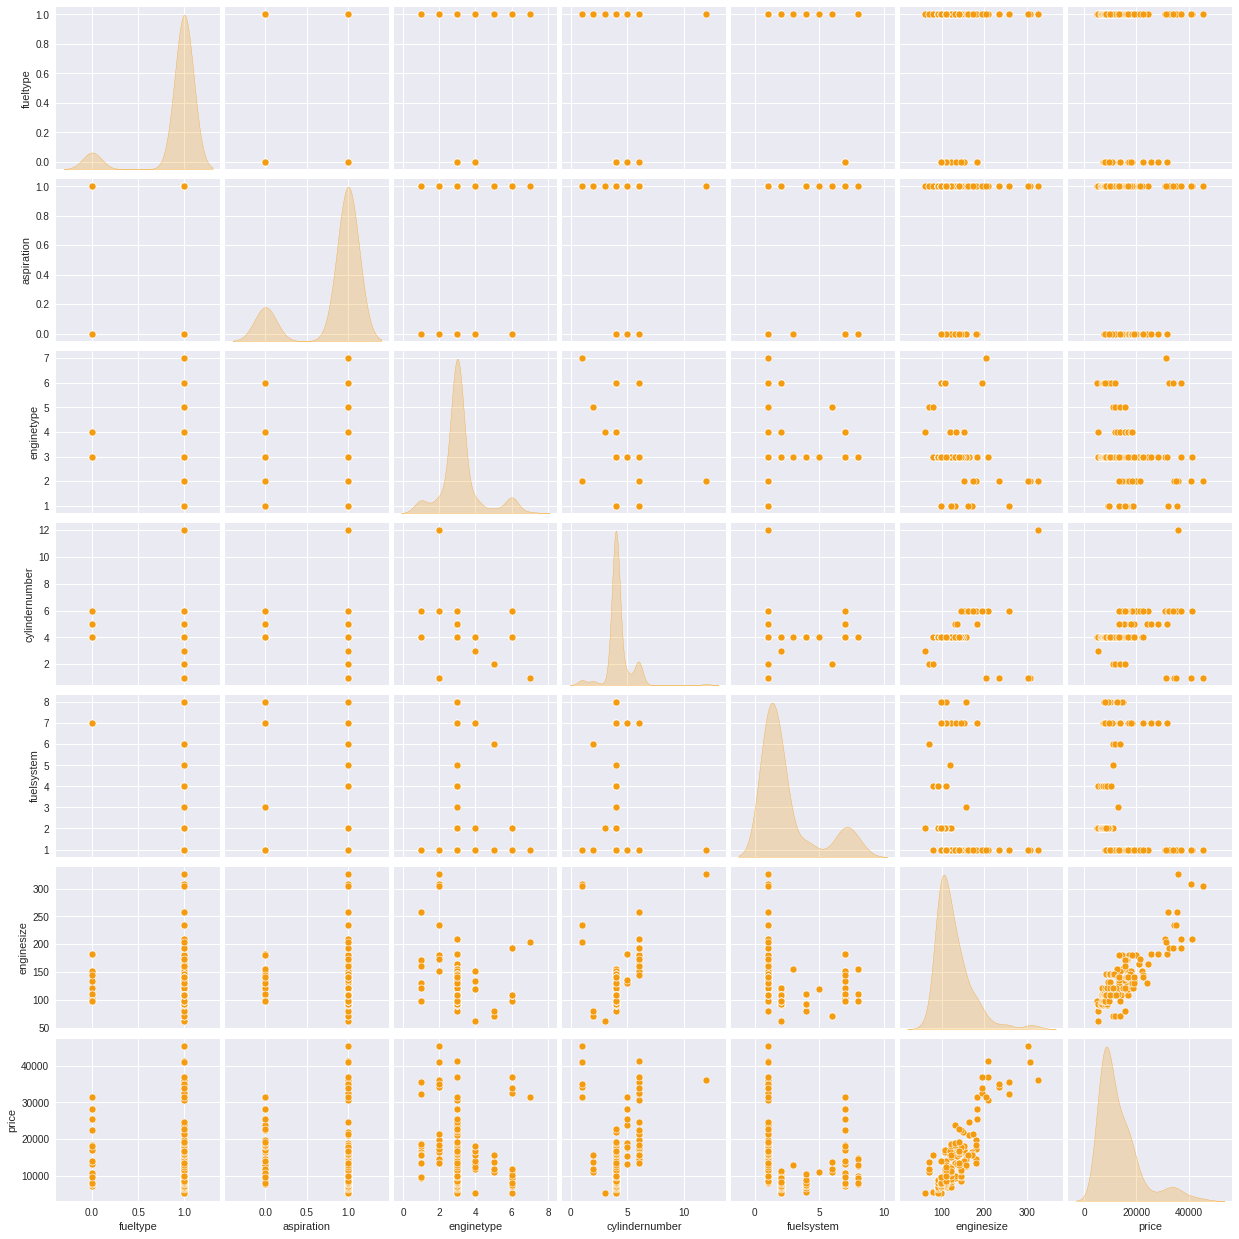

In [33]:
# Pairplot for all the data

sns.pairplot(priceData,
    x_vars=['fueltype', 'aspiration', 'enginetype', 'cylindernumber', 'fuelsystem',
       'enginesize', 'price'],
       y_vars=['fueltype', 'aspiration', 'enginetype', 'cylindernumber', 'fuelsystem',
       'enginesize', 'price'],
       diag_kind='kde'
)

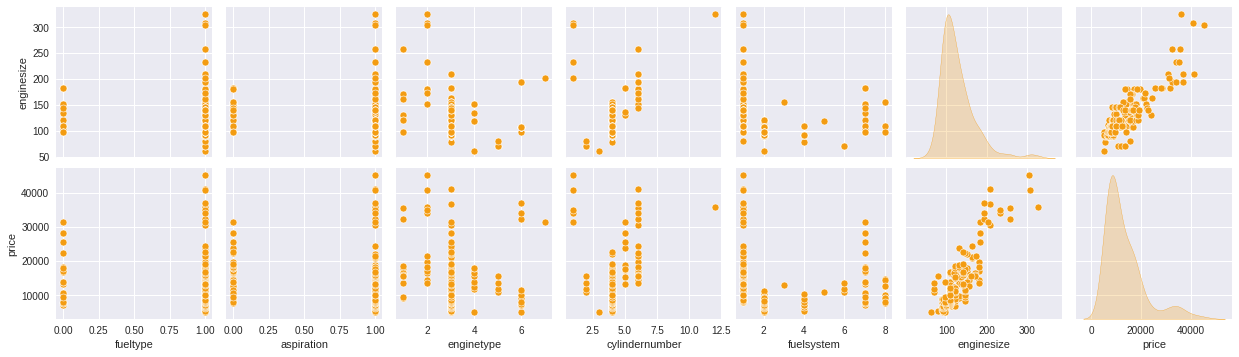

In [38]:
# Pairplot for all the data

sns.pairplot(priceData,
    x_vars=['fueltype', 'aspiration', 'enginetype', 'cylindernumber', 'fuelsystem','enginesize', 'price'],
       y_vars=['enginesize', 'price'],
       diag_kind='kde'
)

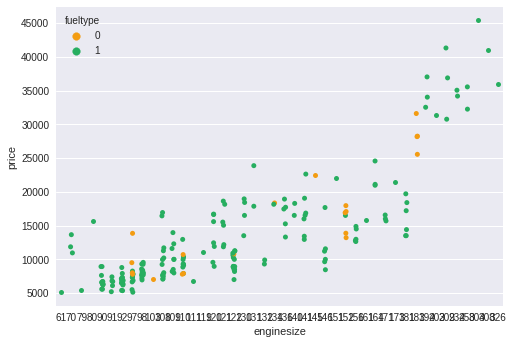

In [40]:
#Strip PLot --> plotting a graph
sns.stripplot(y='price',x='enginesize',data=priceData,hue='fueltype')

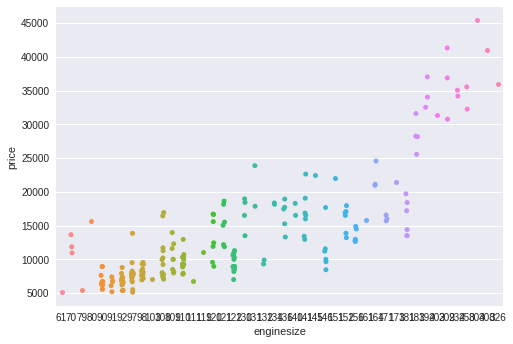

In [41]:
sns.stripplot(y='price',x='enginesize',data=priceData)

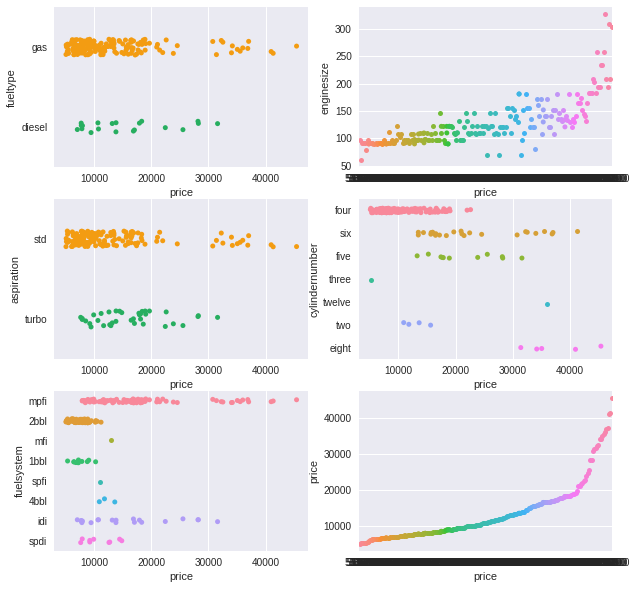

In [44]:
#Subplots --> Plotting subplots together

fig, axarr = plt.subplots(3,2,figsize=(10,10))
sns.stripplot(y='fueltype',x='price',data=mathData,hue=None,ax=axarr[0][0])
sns.stripplot(y='enginesize',x='price',data=mathData,hue=None,ax=axarr[0][1])
sns.stripplot(y='aspiration',x='price',data=mathData,hue=None,ax=axarr[1][0])
sns.stripplot(y='cylindernumber',x='price',data=mathData,hue=None,ax=axarr[1][1])
sns.stripplot(y='fuelsystem',x='price',data=mathData,hue=None,ax=axarr[2][0])
sns.stripplot(y='price',x='price',data=mathData,hue=None,ax=axarr[2][1])


In [46]:
trainData = priceData.sample(frac=0.8,random_state=0)
testData = priceData.drop(trainData.index)
print(trainData.head())
print(testData.tail())

     fueltype  aspiration  enginetype  ...  fuelsystem  enginesize    price
52          1           1           3  ...           2          91   6795.0
181         1           1           1  ...           1         161  15750.0
5           1           1           3  ...           1         136  15250.0
18          1           1           4  ...           2          61   5151.0
188         1           1           3  ...           1         109   9995.0

[5 rows x 7 columns]
     fueltype  aspiration  enginetype  ...  fuelsystem  enginesize    price
194         1           1           3  ...           1         141  12940.0
195         1           1           3  ...           1         141  13415.0
197         1           1           3  ...           1         141  16515.0
201         1           0           3  ...           1         141  19045.0
204         1           0           3  ...           1         141  22625.0

[5 rows x 7 columns]


In [47]:
trainFeatures=trainData.copy()
testFeatures=testData.copy()
print(trainFeatures.head())
print(testFeatures.head())

     fueltype  aspiration  enginetype  ...  fuelsystem  enginesize    price
52          1           1           3  ...           2          91   6795.0
181         1           1           1  ...           1         161  15750.0
5           1           1           3  ...           1         136  15250.0
18          1           1           4  ...           2          61   5151.0
188         1           1           3  ...           1         109   9995.0

[5 rows x 7 columns]
    fueltype  aspiration  enginetype  ...  fuelsystem  enginesize      price
9          1           0           3  ...           1         131  17859.167
21         1           1           3  ...           2          90   5572.000
25         1           1           3  ...           2          90   6692.000
29         1           0           3  ...           3         156  12964.000
31         1           1           3  ...           4          92   6855.000

[5 rows x 7 columns]


In [48]:
trainLabels=trainFeatures.pop('price')
testLabels=testFeatures.pop('price')

We have prepared the data so far for linear regression as a whole but for univeriate we only want one feature for that we will only price and enginesize.

In [51]:
uniPriceData = priceData[['enginesize','price']]
uniPriceData.to_csv('univariate_PriceData_2.csv')

In [52]:
ls

CarPrice_Assignment.csv  cleanCarPrice.csv  univariate_PriceData_2.csv


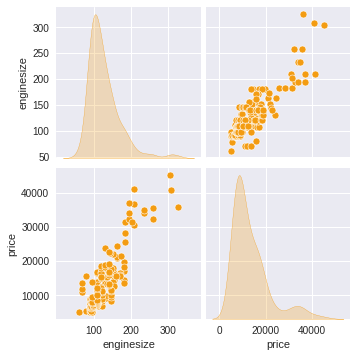

In [54]:
sns.pairplot(uniPriceData,
             x_vars=['enginesize','price'],
             y_vars=['enginesize','price'],
             diag_kind='kde'
             )

In [55]:
uniTrainData = uniPriceData.sample(frac=0.8,random_state=0)
uniTestData = uniPriceData.drop(labels=uniTrainData.index)

In [56]:
print(uniTrainData.head())
print(uniTestData.head())

     enginesize    price
52           91   6795.0
181         161  15750.0
5           136  15250.0
18           61   5151.0
188         109   9995.0
    enginesize      price
9          131  17859.167
21          90   5572.000
25          90   6692.000
29         156  12964.000
31          92   6855.000


In [58]:
uniTrainFeatures=uniTrainData.copy()
uniTestFeatures=uniTestData.copy()

In [59]:
uniTrainLabels=uniTrainFeatures.pop('price')
uniTestLabels=uniTestFeatures.pop('price')

In [60]:
model= tf.keras.Sequential([
                            tf.keras.layers.Dense('1')
])

In [69]:
model.compile(
    loss='mean_absolute_error',
    optimizer = tf.keras.optimizers.SGD(
        learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
        ),
    metrics=['mae','mse']

)

In [71]:
numEpochs=5000
history = model.fit(x=uniTrainFeatures,y=uniTrainLabels, validation_data=(uniTestFeatures,uniTestLabels), epochs=numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
6/6 [==============================] - 0s 6ms/step - loss: 3362.9170 - mae: 3362.9170 - mse: 24683602.0000 - val_loss: 3925.6003 - val_mae: 3925.6003 - val_mse: 29061336.0000
Epoch 2502/5000
6/6 [==============================] - 0s 7ms/step - loss: 3362.9573 - mae: 3362.9573 - mse: 24699412.0000 - val_loss: 3928.0762 - val_mae: 3928.0762 - val_mse: 28982734.0000
Epoch 2503/5000
6/6 [==============================] - 0s 8ms/step - loss: 3363.3704 - mae: 3363.3704 - mse: 24616008.0000 - val_loss: 3928.6106 - val_mae: 3928.6106 - val_mse: 28966862.0000
Epoch 2504/5000
6/6 [==============================] - 0s 7ms/step - loss: 3362.9565 - mae: 3362.9565 - mse: 24605416.0000 - val_loss: 3928.7935 - val_mae: 3928.7935 - val_mse: 28961418.0000
Epoch 2505/5000
6/6 [==============================] - 0s 6ms/step - loss: 3363.0918 - mae: 3363.0918 - mse: 24598212.0000 - val_loss: 3929.0706 - val_mae: 3929.0706 - val_mse: 28953184

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


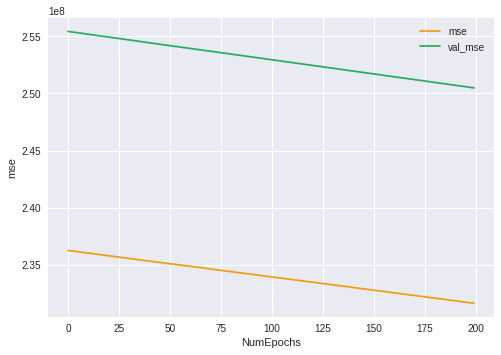

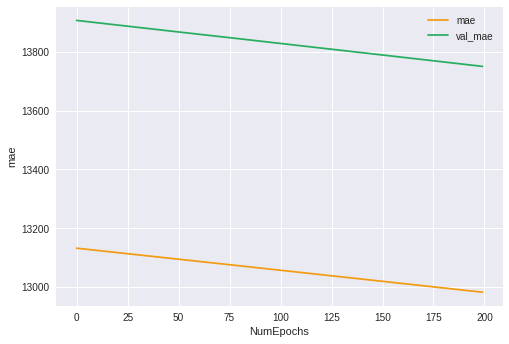

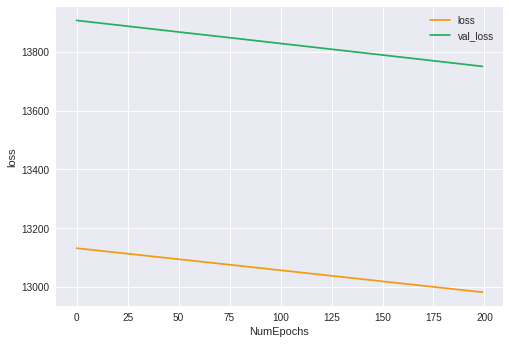

In [64]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [65]:
testPreds=model.predict(uniTestFeatures).flatten()

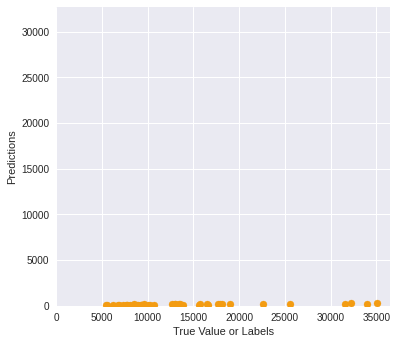

In [66]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(uniTestLabels, testPreds)

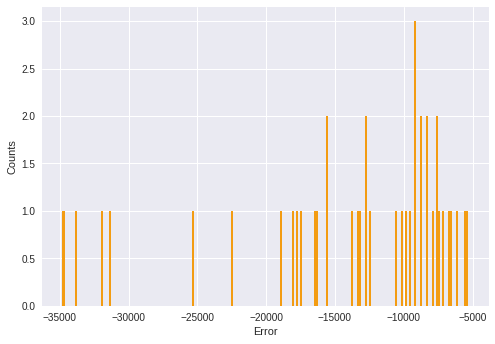

In [67]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, uniTestLabels, numEpochs)